In [3]:
%load_ext autoreload
%autoreload 2

from src import detect_faces, show_bboxes
from PIL import Image
import cv2
import numpy as np
from src.align_trans import get_reference_facial_points, warp_and_crop_face

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
img = Image.open('images/jf.jpg')

In [5]:
img_cv2 = np.array(img)[...,::-1]

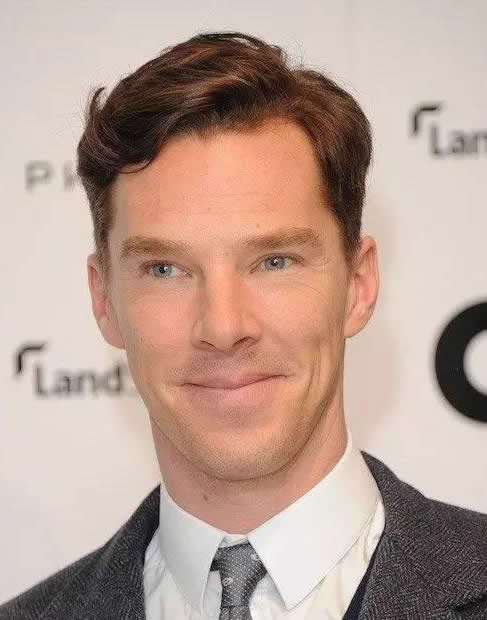

In [6]:
img

In [7]:
src = np.array([                                                                                                                                                                     
 [30.2946, 51.6963],                                                                                                                                                                
 [65.5318, 51.5014],                                                                                                                                                                
 [48.0252, 71.7366],                                                                                                                                                                
 [33.5493, 92.3655],                                                                                                                                                                
 [62.7299, 92.2041] ], dtype=np.float32 )

In [8]:
src[:,0] *= (img.size[0]/96)
src[:,1] *= (img.size[1]/112)

In [9]:
img.size

(487, 620)

In [10]:
src

array([[153.68198, 286.17593],
       [332.43735, 285.09702],
       [243.62782, 397.11334],
       [170.19281, 511.30902],
       [318.22354, 510.41556]], dtype=float32)

In [11]:
bounding_boxes, landmarks = detect_faces(img)

FileNotFoundError: [Errno 2] No such file or directory: 'mtcnn_pytorch/src/weights/pnet.npy'

In [ ]:
dst = landmarks[0].astype(np.float32)

facial5points = [[dst[j],dst[j+5]] for j in range(5)]

from skimage import transform as trans
tform = trans.SimilarityTransform()    

                                                                                                                                              
tform.estimate(np.array(facial5points), src)

M = tform.params[0:2,:]

In [ ]:
M

In [ ]:
warped = cv2.warpAffine(img_cv2,M,(img.size[0],img.size[1]), borderValue = 0.0)

In [ ]:
warped.shape

In [ ]:
Image.fromarray(warped[...,::-1])

In [ ]:
img

In [ ]:
faces[0].size

In [ ]:
from tqdm import tqdm_notebook as tqdm
bounding_boxes, landmarks = detect_faces(img)
faces = []
img_cv2 = np.array(img)[...,::-1]
for i in tqdm(range(len(bounding_boxes))):
    box = bounding_boxes[i][:4].astype(np.int32).tolist()
    for idx, coord in enumerate(box[:2]):
        if coord > 1:
            box[idx] -= 1
    if box[2] + 1 < img_cv2.shape[1]:
        box[2] += 1
    if box[3] + 1 < img_cv2.shape[0]:
        box[3] += 1
    face = img_cv2[box[1]:box[3],box[0]:box[2]]
    landmark = landmarks[i]
    facial5points = [[landmark[j] - box[0],landmark[j+5] - box[1]] for j in range(5)]
    dst_img = warp_and_crop_face(face,facial5points)
    faces.append(Image.fromarray(dst_img[...,::-1]))